In [4]:
import numpy as np
import pandas as pd



In [5]:
df1 = pd.read_csv('Spam-Classification.csv')
df2 = pd.read_csv('new.csv')
df3 = pd.read_csv('spam_ham_india.csv')
df1.head()
df1.info()
df1 = df1.rename(columns={'CLASS': 'Label'})
df1['Label'] = df1.Label.map({'ham':0, 'spam':1})

df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CLASS   1598 non-null   object
 1   SMS     1598 non-null   object
dtypes: object(2)
memory usage: 25.1+ KB


,Label,SMS
0,0,"said kiss, kiss, i can't do the sound effects..."
1,0,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2,1,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3,1,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4,1,**FREE MESSAGE**Thanks for using the Auction S...
...,...,...
1593,1,Final notice! Loan pre-approved £2000—accept n...
1594,1,Final voice alert! Urgent message waiting. Cal...
1595,1,Voicemail Notification: You have 1 urgent aler...
1596,1,A message is pending on your inbox. Call 08716...


In [6]:
duplicates = df1.duplicated(keep = 'first')
df1 = df1[~duplicates]
df1


,Label,SMS
0,0,"said kiss, kiss, i can't do the sound effects..."
1,0,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2,1,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3,1,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4,1,**FREE MESSAGE**Thanks for using the Auction S...
...,...,...
1593,1,Final notice! Loan pre-approved £2000—accept n...
1594,1,Final voice alert! Urgent message waiting. Cal...
1595,1,Voicemail Notification: You have 1 urgent aler...
1596,1,A message is pending on your inbox. Call 08716...


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1479 entries, 0 to 1597
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   1479 non-null   int64 
 1   SMS     1479 non-null   object
dtypes: int64(1), object(1)
memory usage: 34.7+ KB


In [8]:
df2.info()
df2.head()
df2 = df2.rename(columns={'Message': 'SMS'})
df2['Label'] = df2.Label.map({'spam':1, 'ham':0})
df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    739 non-null    object
 1   Message  739 non-null    object
dtypes: object(2)
memory usage: 11.7+ KB


,Label,SMS
0,1,"Dear Student, Its never too late-clear your ba..."
1,1,Join V-STUDY and score excellent marks in clas...
2,1,"Join crash courses for B.ST,A/C'S,ECO,ENG,&IP ..."
3,1,CRASH COURSES by BEST POOL OF FACULTY. ENGLISH...
4,0,"Dear Ola Shuttle user, get 60% Off on your nex..."
...,...,...
734,1,You’ve been selected for a £250 reward! Call 0...
735,1,Congratulations! You’ve won a £5000 shopping s...
736,1,Urgent: Your account has been flagged for susp...
737,1,Special offer! Get a £1000 voucher with your n...


In [9]:
duplicates2 = df2.duplicated(keep = 'first')
df2 = df2[~duplicates2]
df2

,Label,SMS
0,1,"Dear Student, Its never too late-clear your ba..."
1,1,Join V-STUDY and score excellent marks in clas...
2,1,"Join crash courses for B.ST,A/C'S,ECO,ENG,&IP ..."
3,1,CRASH COURSES by BEST POOL OF FACULTY. ENGLISH...
4,0,"Dear Ola Shuttle user, get 60% Off on your nex..."
...,...,...
734,1,You’ve been selected for a £250 reward! Call 0...
735,1,Congratulations! You’ve won a £5000 shopping s...
736,1,Urgent: Your account has been flagged for susp...
737,1,Special offer! Get a £1000 voucher with your n...


In [10]:
df3.info()
df3.head()
df3 = df3.rename(columns={'Msg': 'SMS'})
df3['Label'] = df3.Label.map({'spam':1, 'ham':0})
df3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267 entries, 0 to 2266
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Msg     2266 non-null   object
 1   Label   2267 non-null   object
dtypes: object(2)
memory usage: 35.6+ KB


,SMS,Label
0,CONGRATULATIONS! FREE 2GB data is yours! Claim...,1
1,Hi! Thank you for being with Vi-India's FASTES...,1
2,"As part of Cyber Swachhta Pakhwada, CERT-In Go...",1
3,I will try to manage took tablets,0
4,Study from Home with Vi!! Watch Kite Victers C...,1
...,...,...
2262,"Dear Customer, You have a missed call from +91...",1
2263,"Dear User, Vistor Id - 7538XXX. Loan Applicati...",1
2264,"Congrats, Y0UR Received Rs.592000 L0AN is Appr...",1
2265,Hi! 50% off on proc. fees will be gone soon! A...,1


In [11]:
df3 = df3[['Label', 'SMS', *[col for col in df3.columns if col not in ['Label', 'SMS']]]]
df3

,Label,SMS
0,1,CONGRATULATIONS! FREE 2GB data is yours! Claim...
1,1,Hi! Thank you for being with Vi-India's FASTES...
2,1,"As part of Cyber Swachhta Pakhwada, CERT-In Go..."
3,0,I will try to manage took tablets
4,1,Study from Home with Vi!! Watch Kite Victers C...
...,...,...
2262,1,"Dear Customer, You have a missed call from +91..."
2263,1,"Dear User, Vistor Id - 7538XXX. Loan Applicati..."
2264,1,"Congrats, Y0UR Received Rs.592000 L0AN is Appr..."
2265,1,Hi! 50% off on proc. fees will be gone soon! A...


In [12]:
df_1 = pd.concat([df1, df2, df3])
df_1

,Label,SMS
0,0,"said kiss, kiss, i can't do the sound effects..."
1,0,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2,1,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3,1,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4,1,**FREE MESSAGE**Thanks for using the Auction S...
...,...,...
2262,1,"Dear Customer, You have a missed call from +91..."
2263,1,"Dear User, Vistor Id - 7538XXX. Loan Applicati..."
2264,1,"Congrats, Y0UR Received Rs.592000 L0AN is Appr..."
2265,1,Hi! 50% off on proc. fees will be gone soon! A...


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

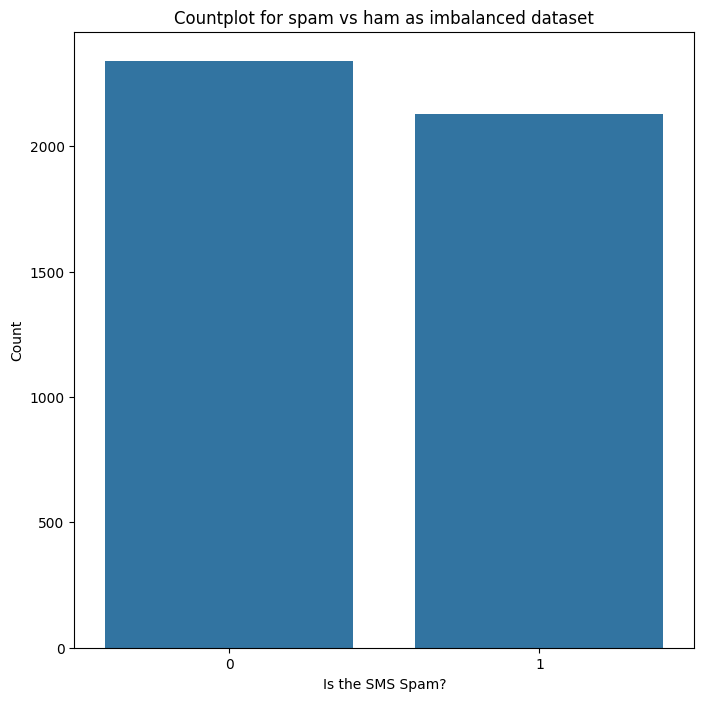

In [14]:
plt.figure(figsize=(8,8))
g = sns.countplot(x="Label", data = df_1)
p = plt.title('Countplot for spam vs ham as imbalanced dataset')
p = plt.xlabel('Is the SMS Spam?')
p = plt.ylabel('Count')
p = plt.ylabel('Count')

In [15]:
only_spam = df_1[df_1['Label'] == 1]
only_spam
print("No.of spams:", len(only_spam))
print("No. of Hams:", len(df_1) - len(only_spam))

No.of spams: 2127
No. of Hams: 2340


In [16]:
df_1['SMS'] = df_1['SMS'].astype(str)
df_1

#Here we convert the float values into strings for further plotting.

,Label,SMS
0,0,"said kiss, kiss, i can't do the sound effects..."
1,0,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2,1,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3,1,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4,1,**FREE MESSAGE**Thanks for using the Auction S...
...,...,...
2262,1,"Dear Customer, You have a missed call from +91..."
2263,1,"Dear User, Vistor Id - 7538XXX. Loan Applicati..."
2264,1,"Congrats, Y0UR Received Rs.592000 L0AN is Appr..."
2265,1,Hi! 50% off on proc. fees will be gone soon! A...


**Cleaning the SMS Messages(Includes  removal of common words, reducing word to their base word, unwanted punctuations and symbols)**


In [17]:
#corpus is a massive dataset of all kinds of natural language datasets
import nltk #(nltk library for NLP )
import re #regular expression
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords #stopwords like a, the
from nltk.stem import WordNetLemmatizer #lemmatiation eg.- Ran, running -> Run

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [18]:
corpus = []
wnl = WordNetLemmatizer()

for sms in list(df_1.SMS):
  SMS = re.sub(pattern = '[^a-zA-Z]', repl = ' ', string = sms) #This line uses regular expressions (re.sub) to replace any character that is not an alphabet (a-z or A-Z) with a space. This effectively removes punctuation, numbers, and special characters, leaving only words.
  SMS = SMS.lower()
  words = SMS.split()
  filtered_words = [wnl.lemmatize(word) for word in words if word not in stopwords.words('english')]

  SMS = ' '.join(filtered_words)

  corpus.append(SMS)
corpus

['said kiss kiss sound effect gorgeous man kind person need smile brighten day',
 'lt gt ish minute minute ago wtf',
 'bank granite issue strong buy explosive pick member nasdaq symbol cdgt per',
 'free polyphonic ringtone text super get free poly tone week sn pobox nr z subscription pw',
 'free message thanks using auction subscription service p msgrcvd skip auction txt unsubscribe txt stop customercare',
 'congratulation week competition draw u prize claim call b c stop sm ppm',
 'urgent nd attempt contact u u call b csbcm wc n xx callcost ppm mobilesvary max',
 'forwarded hi mailbox messaging sm alert message match please call back retrieve message match',
 'forwarded hi mailbox messaging sm alert match please call back retrieve message match cc p min',
 'forwarded please call immediately urgent message waiting',
 'forwarded free entry weekly comp send word enter c www textcomp com',
 'rodger burn msg tried call reply sm free nokia mobile free camcorder please call delivery tomorrow

**WORDCLOUD SMS CLASSIFICATION (Visual Representation of SPAM AND HAM)**

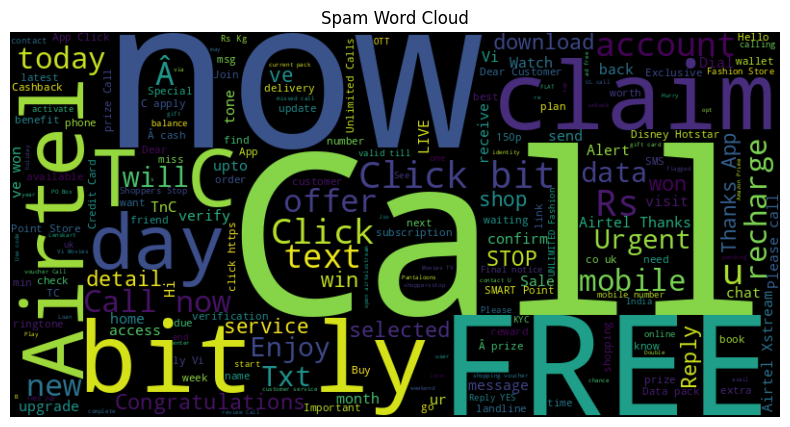

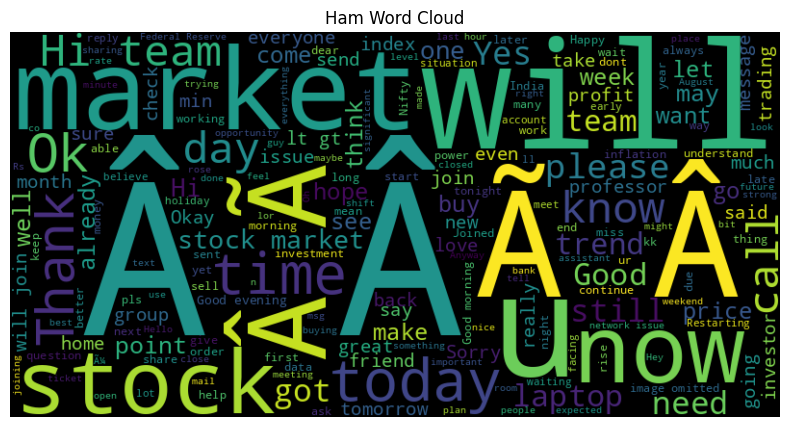

In [19]:
from wordcloud import WordCloud
spam_words = ' '.join(df_1[df_1['Label'] == 1]['SMS'])
ham_words = ' '.join(df_1[df_1['Label'] == 0]['SMS'])

spam_wordcloud = WordCloud(width=800, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=800, height=400).generate(ham_words)

plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')
plt.show()

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, pair_confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=1000)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

X = pd.DataFrame(vectors, columns = feature_names)
y = df_1['Label']



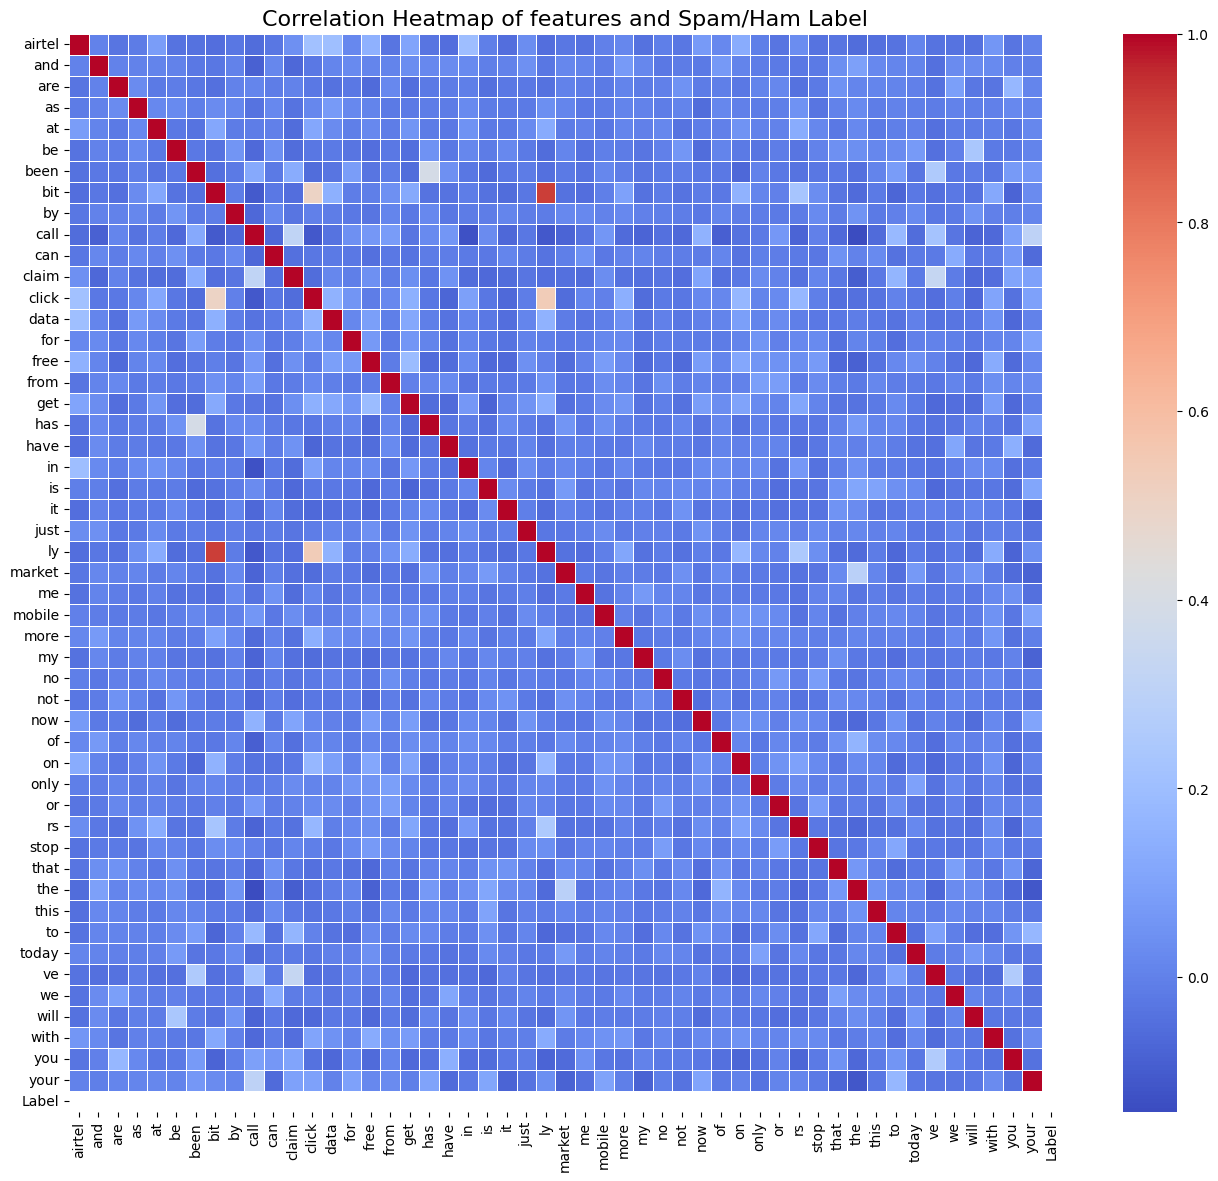

In [57]:
df_1 = df_1[['Label', 'SMS']]


df_1 = df_1.dropna(subset=['SMS']).reset_index(drop=True)


df_1['label_encoded'] = df_1['Label'].map({'ham': 0, 'spam': 1})


vectorizer = TfidfVectorizer(max_features=50)
X_tfidf = vectorizer.fit_transform(df_1['SMS'])


tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())


tfidf_df['Label'] = df_1['label_encoded'].values

corr = tfidf_df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of features and Spam/Ham Label', fontsize=16)
plt.show()


In [23]:
X_train,X_test, y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df_1['Label']) #stratification(prevents Bias in the model, both in train and test.)


In [24]:
X_train

,aadhaar,able,ac,access,account,account flagged,account locked,account review,account shop,account statement,...,xx,xxx,ya,yeah,year,yes,yesterday,yet,yr,zee
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.301266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**USING NAIVE BAYES FOR CLASSIFICATION
(Multinomial Naive Bayes, Gaussian Naive Bayes, Bernoulli Naive Bayes)**

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [26]:
#Multinomial Naive Bayes
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring = 'f1', cv = 10)
print(round(cv.mean(), 3))
print(round(cv.std(), 3))


0.925
0.049


In [27]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred_mnb))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       468
           1       0.94      0.94      0.94       426

    accuracy                           0.94       894
   macro avg       0.94      0.94      0.94       894
weighted avg       0.94      0.94      0.94       894



In [29]:
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
precision_mnb = precision_score(y_test, y_pred_mnb)

print(f"Multinomial Naive Bayes - Accuracy: {accuracy_mnb:.3f}, Precision: {precision_mnb:.3f}")

Multinomial Naive Bayes - Accuracy: 0.943, Precision: 0.939


In [30]:
from sklearn.metrics import confusion_matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
cm_mnb

array([[442,  26],
       [ 25, 401]])

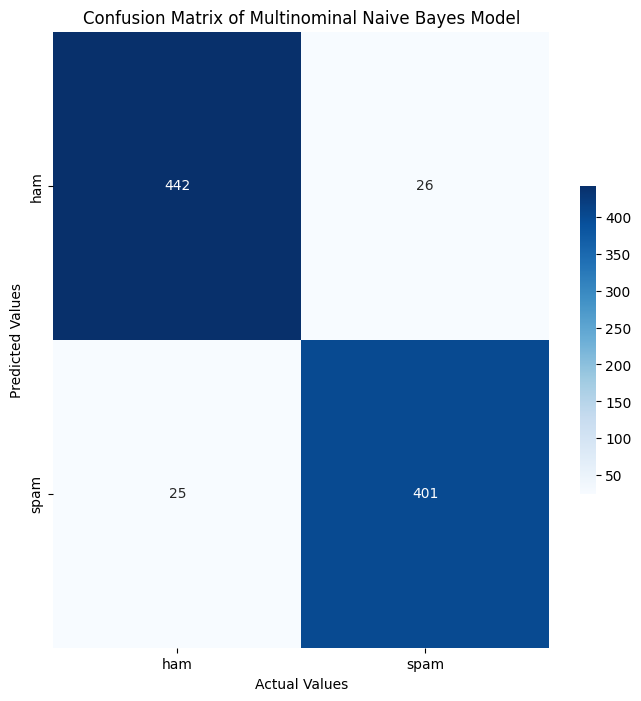

In [31]:
plt.figure(figsize=(8,8))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data = cm_mnb, xticklabels = axis_labels, yticklabels = axis_labels, annot = True, fmt='g', cbar_kws = {"shrink":0.5} , cmap="Blues")
p = plt.title("Confusion Matrix of Multinominal Naive Bayes Model")
p = plt.xlabel('Actual Values')
p = plt.ylabel('Predicted Values')

In [32]:
#Gaussian Naive Bayes
gnb = GaussianNB()
cv1 = cross_val_score(gnb, X, y, scoring = 'f1', cv = 10)
print(round(cv1.mean(), 3))
print(round(cv1.std(), 3))
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)


0.927
0.038


In [33]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       468
           1       0.96      0.92      0.94       426

    accuracy                           0.94       894
   macro avg       0.95      0.94      0.94       894
weighted avg       0.94      0.94      0.94       894



In [34]:
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
print(f"Gaussian Naive Bayes - Accuracy: {accuracy_gnb:.3f}, Precision: {precision_gnb:.3f}")

Gaussian Naive Bayes - Accuracy: 0.944, Precision: 0.963


In [35]:
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
print(cm_gnb)

[[453  15]
 [ 35 391]]


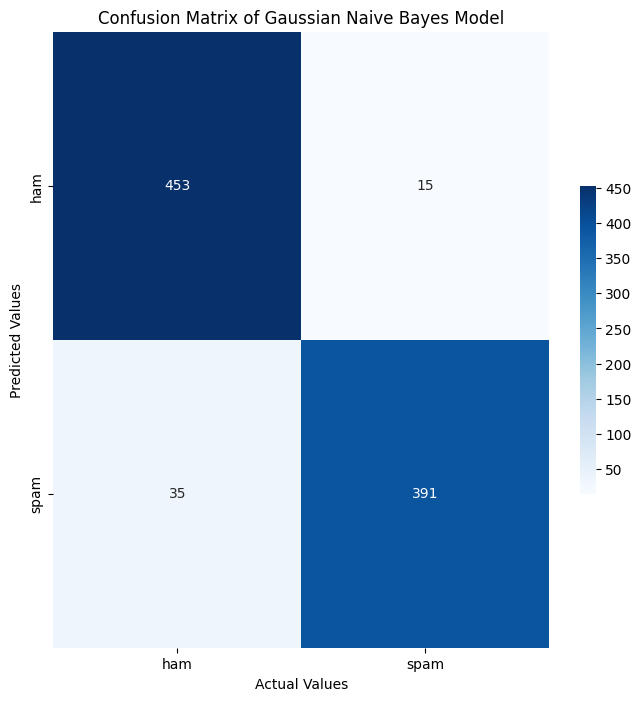

In [36]:
plt.figure(figsize=(8,8))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data = cm_gnb, xticklabels = axis_labels, yticklabels = axis_labels, annot = True, fmt='g', cbar_kws = {"shrink":0.5} , cmap="Blues")
p = plt.title("Confusion Matrix of Gaussian Naive Bayes Model")
p = plt.xlabel('Actual Values')
p = plt.ylabel('Predicted Values')

In [37]:
#Bernoulli Naive Bayes
bnb = BernoulliNB()
cv_scores = cross_val_score(bnb, X, y, scoring='f1', cv=10)
print({round(cv_scores.mean(), 3)})
print( {round(cv_scores.std(), 3)})

bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)



{np.float64(0.939)}
{np.float64(0.051)}


In [38]:
print(classification_report(y_test, y_pred_bnb))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       468
           1       0.99      0.93      0.96       426

    accuracy                           0.96       894
   macro avg       0.97      0.96      0.96       894
weighted avg       0.96      0.96      0.96       894



In [39]:
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
precision_bnb = precision_score(y_test, y_pred_bnb)
print(f"Bernoulli Naive Bayes - Accuracy: {accuracy_bnb:.3f}, Precision: {precision_bnb:.3f}")


Bernoulli Naive Bayes - Accuracy: 0.963, Precision: 0.992


In [40]:
cm_bnb = confusion_matrix(y_test, y_pred_bnb)
cm_bnb

array([[465,   3],
       [ 30, 396]])

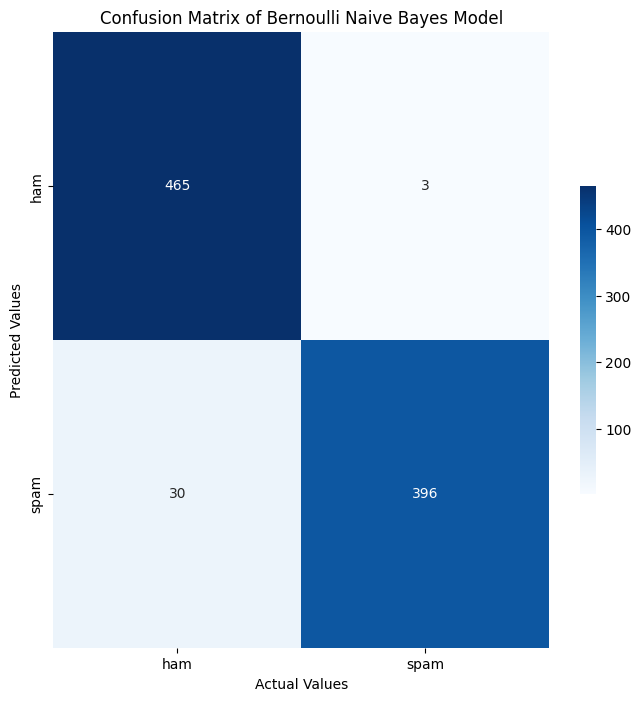

In [41]:
plt.figure(figsize=(8,8))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data = cm_bnb, xticklabels = axis_labels, yticklabels = axis_labels, annot = True, fmt='g', cbar_kws = {"shrink":0.5} , cmap="Blues")
p = plt.title("Confusion Matrix of Bernoulli Naive Bayes Model")
p = plt.xlabel('Actual Values')
p = plt.ylabel('Predicted Values')

**Using DECISION TREE CLASSIFIER**

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt, X, y, scoring = 'f1', cv = 10)
print(round(cv1.mean(), 3))
print(round(cv1.std(),3))

0.92
0.042


In [43]:
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       468
           1       0.93      0.93      0.93       426

    accuracy                           0.94       894
   macro avg       0.93      0.93      0.93       894
weighted avg       0.94      0.94      0.94       894



In [45]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier - Accuracy: {accuracy_dt:.3f}, Precision: {precision_dt:.3f}")

Decision Tree Classifier - Accuracy: 0.935, Precision: 0.932


In [46]:
cm = confusion_matrix(y_test, y_pred_dt)
cm

array([[439,  29],
       [ 29, 397]])

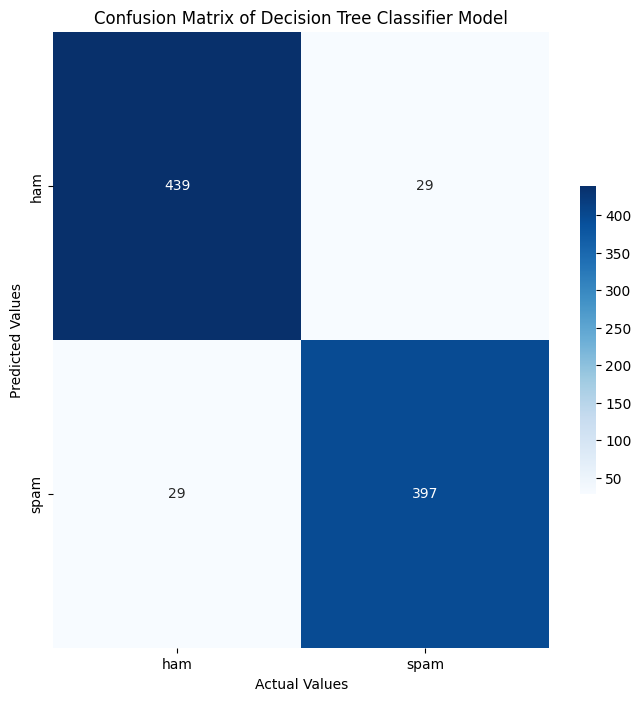

In [47]:
plt.figure(figsize=(8,8))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data = cm, xticklabels = axis_labels, yticklabels = axis_labels, annot = True, fmt='g', cbar_kws = {"shrink":0.5} , cmap="Blues")
p = plt.title("Confusion Matrix of Decision Tree Classifier Model")
p = plt.xlabel('Actual Values')
p = plt.ylabel('Predicted Values')


**SUPPORT VECTOR MACHINE**

In [48]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', probability=True)
cv_svm = cross_val_score(svm_classifier, X, y, scoring = 'f1', cv = 10)
print(round(cv_svm.mean(), 3))
print(round(cv_svm.std(), 3))



0.944
0.045


In [49]:
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       0.96      0.97      0.97       468
           1       0.96      0.96      0.96       426

    accuracy                           0.96       894
   macro avg       0.96      0.96      0.96       894
weighted avg       0.96      0.96      0.96       894



In [51]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
print(f"Support Vector Machine - Accuracy: {accuracy_svm:.3f}, Precision: {precision_svm:.3f}")

Support Vector Machine - Accuracy: 0.964, Precision: 0.965


In [52]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[453  15]
 [ 17 409]]


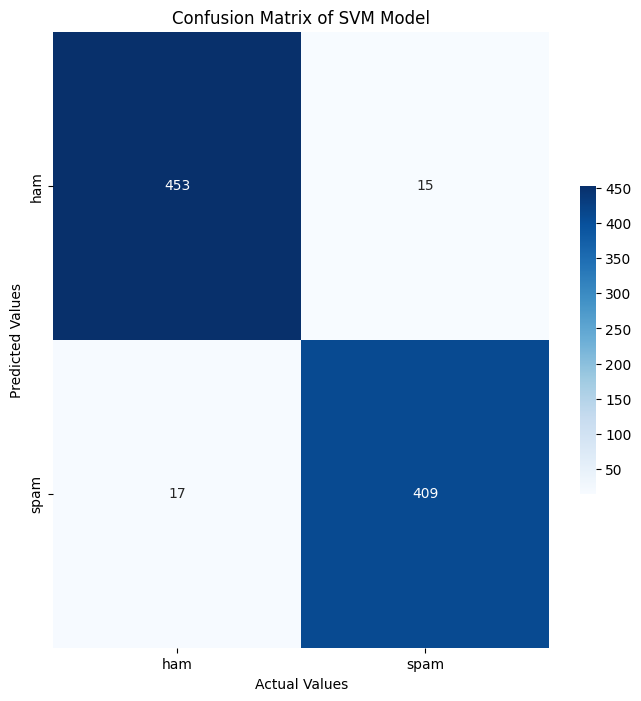

In [53]:
plt.figure(figsize=(8, 8))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm_svm, xticklabels=axis_labels, yticklabels=axis_labels, annot=True, fmt='g', cbar_kws={"shrink": 0.5}, cmap="Blues")
p = plt.title("Confusion Matrix of SVM Model")
p = plt.xlabel('Actual Values')
p = plt.ylabel('Predicted Values')
plt.show()

**CHECKING THE PERFORMANCE OF CLASSIFIERS USED**
1. Multinomial Naive Bayes
2. Gaussian Naive Bayes
3. Bernaulli Naive Bayes
4. Decision Tress Classifier
5. Support Vector Machine

*USING Precision Recall Curve (PR Curve)*




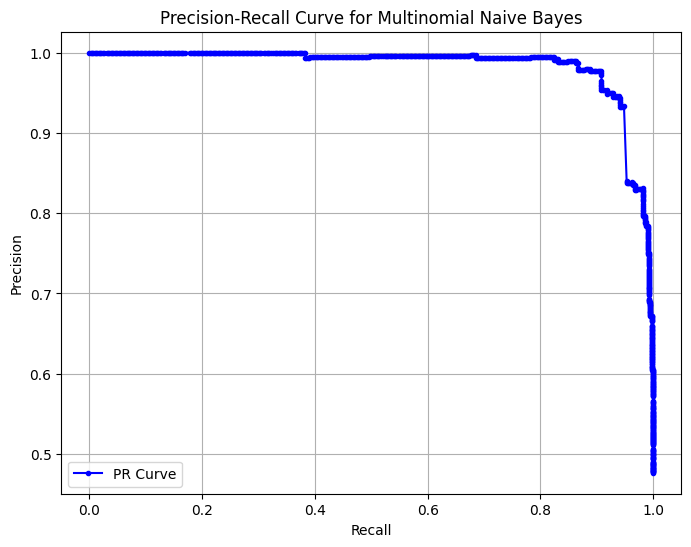

Multinomial Naive Bayes - Average Precision: 0.984


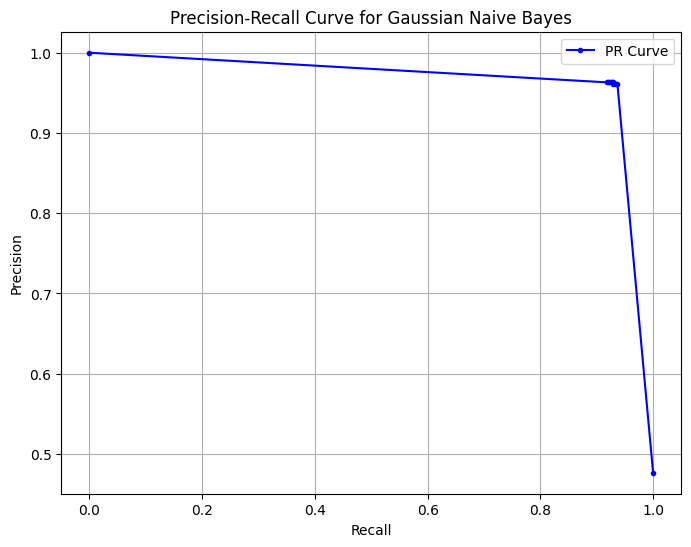

Gaussian Naive Bayes - Average Precision: 0.932


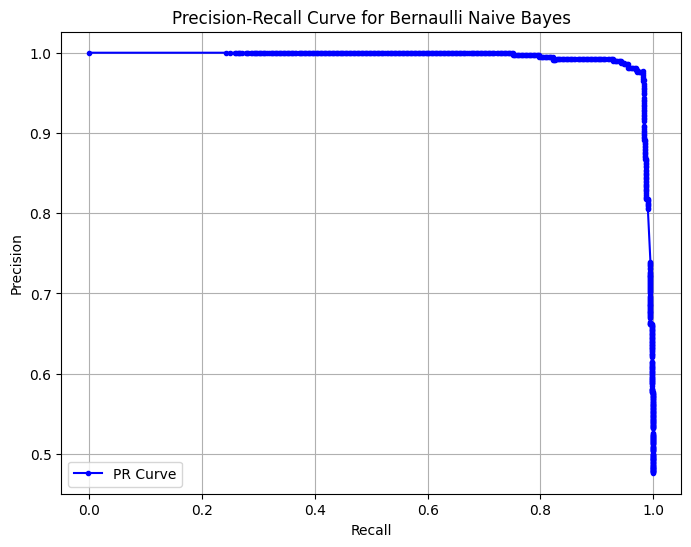

Bernoulli Naive Bayes - Average Precision: 0.994


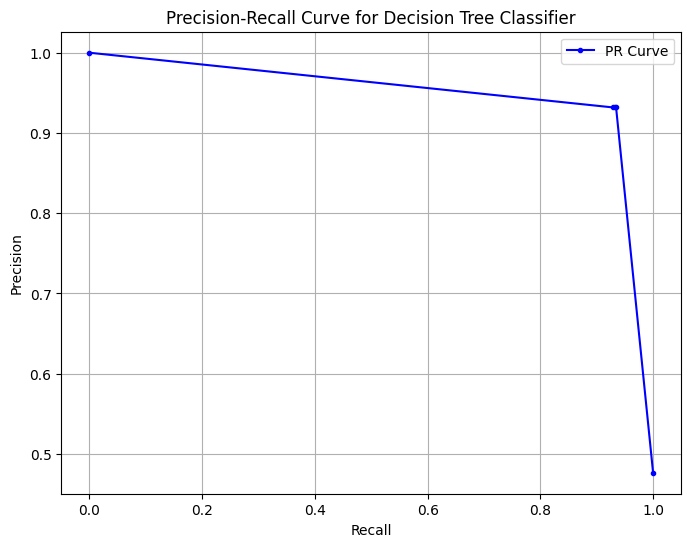

Decision Tree Classifier - Average Precision: 0.902


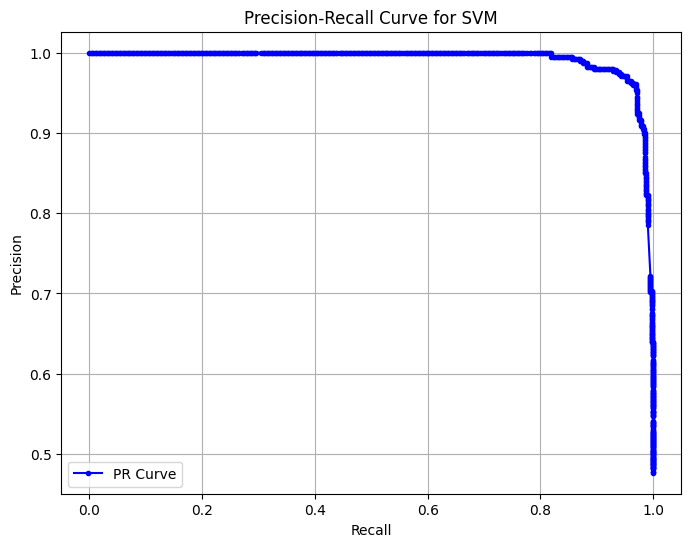

Support Vector Machine - Average Precision: 0.992


In [54]:
from sklearn.metrics import precision_recall_curve, average_precision_score

#Since the Spam and Ham are highly imbalanced, we use PR Curve

#For Multinomial Naive Bayes

y_pred_prob_mnb = mnb.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_mnb)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='b', label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multinomial Naive Bayes')
plt.legend()
plt.grid()
plt.show()
avg_precision_mnb = average_precision_score(y_test, y_pred_prob_mnb)
print(f"Multinomial Naive Bayes - Average Precision: {avg_precision_mnb:.3f}")


#For Gaussian Naive Bayes
y_pred_prob_gnb = gnb.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_gnb)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='b', label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gaussian Naive Bayes')
plt.legend()
plt.grid()
plt.show()
avg_precision_gnb = average_precision_score(y_test, y_pred_prob_gnb)
print(f"Gaussian Naive Bayes - Average Precision: {avg_precision_gnb:.3f}")




#For Bernaulli Naive Bayes*
y_pred_prob_bnb = bnb.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_bnb)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='b', label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Bernaulli Naive Bayes')
plt.legend()
plt.grid()
plt.show()
avg_precision_bnb = average_precision_score(y_test, y_pred_prob_bnb)
print(f"Bernoulli Naive Bayes - Average Precision: {avg_precision_bnb:.3f}")

#Decision Tree Classifier
y_pred_prob_dt = dt.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_dt)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='b', label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree Classifier')
plt.legend()
plt.grid()
plt.show()
avg_precision_dt = average_precision_score(y_test, y_pred_prob_dt)
print(f"Decision Tree Classifier - Average Precision: {avg_precision_dt:.3f}")

#Support Vector Machine
y_pred_prob_svm = svm_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_svm)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='b', label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM')
plt.legend()
plt.grid()
plt.show()
avg_precision_svm = average_precision_score(y_test, y_pred_prob_svm)
print(f"Support Vector Machine - Average Precision: {avg_precision_svm:.3f}")




**Testing Our Model with Example.**

In [55]:
def predict_spam(sms):
  SMS = re.sub(pattern = '[^a-zA-Z]', repl = ' ', string = sms)
  SMS = SMS.lower()
  words = SMS.split()
  filtered_words = [wnl.lemmatize(word) for word in words if word not in stopwords.words('english')]
  temp = tfidf.transform([SMS]).toarray()
  message = ' '.join(filtered_words)
  num_features = temp.shape[1]
  if num_features < 500:
    padding = np.zeros((1, 500 - num_features))
    temp = np.concatenate([temp, padding], axis=1)
  return dt.predict(temp)

In [56]:
sample_SMS = 'Sign up the link '

if predict_spam(sample_SMS):
  print('Spam')
else:
  print('Ham')

Ham


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
